In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp

In [2]:
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt

# Functions

In [3]:
def kernel_fits(img, kernel, stride):
    output_x = (img.shape[0] - kernel.shape[0])/stride
    output_y = (img.shape[1] - kernel.shape[1])/stride
    return (output_x, output_y, (output_x.is_integer() and output_y.is_integer()))

In [4]:
## need maybe for normalization of output
def norm_zero_one(a):
    return (a - np.min(a))/np.ptp(a)

In [5]:
def conv(image, kernel, stride):
    
    # check if kernel fits image without padding
    if kernel_fits(image, kernel, stride)[2]:
        
        # create output array, here 3d
        output = np.zeros((int(kernel_fits(image, kernel, 1)[0]), int(kernel_fits(image, kernel, 1)[1]), 3))
        
        # starting points of process
        start_x = 0
        start_y = 0
        z = 0
        end_x = kernel.shape[0]
        end_y = kernel.shape[1]
        stride_x = stride
        stride_y = stride

        # loop over z-dimension
        while z < 3:
            
            # loop over y-dimension (vertical)
            while end_y < image.shape[1]:
                
                # loop over z-dimension (horizontal)
                while end_x < image.shape[0]:
                    
                    # add kernel sum to output
                    output[start_x, start_y, z] = np.sum(image[start_x:end_x, start_y:end_y, z] * kernel)   
                    
                    # move kernel horizontally
                    start_x += stride_x
                    end_x += stride_x
                
                # reset hozintal movement
                start_x = 0
                end_x = kernel.shape[0]
                
                # move kernel vertically
                start_y += stride_y
                end_y += stride_y
            
            # reset vertical movement
            start_y = 0
            end_y = kernel.shape[1]
            
            # move kernel next z
            z += 1
             
        return output
            
    else:
        print("Kernel does not fit image without padding")

# Kernels

In [6]:
kernel_sharp = np.array([[0, -1, 0],
                 [-1, 5, -1],
                 [0, -1, 0]])
kernel_sharp

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [7]:
kernel_edge = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])
kernel_edge

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [8]:
kernel_blur = np.ones((3,3))*(1/9)
kernel_blur

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

# Images

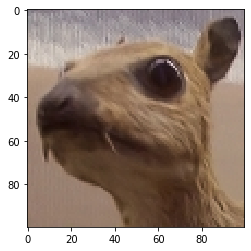

In [9]:
animal = imread('https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png')
animal.shape
plt.imshow(animal)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


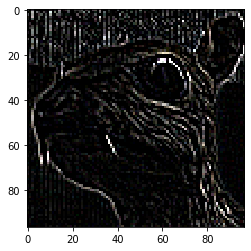

In [10]:
animal_output = conv(animal, kernel_edge, 1)
plt.imshow(animal_output)

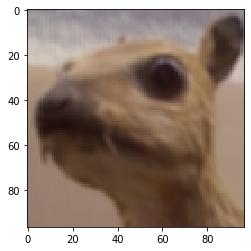

In [11]:
animal_output = conv(animal, kernel_blur, 1)
plt.imshow(animal_output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


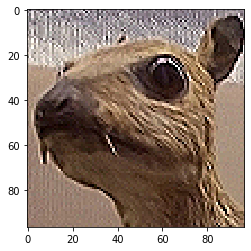

In [12]:
animal_output = conv(animal, kernel_sharp, 1)
plt.imshow(animal_output)